In [1]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
df = pd.read_csv('Numerical_data(No Zero).csv')

In [3]:
df

,Unnamed: 0,Unnamed: 0.1,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Hotel stars,Nr. rooms,Member years,Num Traveler type,Num User country,Num Hotel name,Dummy Pool,Dummy Gym,Dummy Tennis,Dummy Spa,Dummy Casino,Dummy Free Internet,Num Review month,Num User continent
0,0,0,11,4,13,5,3.0,3773,9,1,1,1,0,1,0,0,1,1,1,1
1,1,1,119,21,75,3,3.0,3773,3,2,1,1,0,1,0,0,1,1,1,1
2,2,2,36,9,25,5,3.0,3773,2,3,1,1,0,1,0,0,1,1,2,1
3,3,3,14,7,14,4,3.0,3773,6,1,2,1,0,1,0,0,1,1,2,2
4,4,4,5,5,2,4,3.0,3773,7,5,3,1,0,1,0,0,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,499,499,15,4,8,5,4.0,826,1,4,2,21,1,1,0,1,1,1,10,2
500,500,500,50,13,29,4,4.0,826,8,4,3,21,1,1,0,1,1,1,11,1
501,501,501,154,23,31,4,4.0,826,4,1,1,21,1,1,0,1,1,1,11,1
502,502,502,9,6,5,2,4.0,826,9,3,1,21,1,1,0,1,1,1,12,1


In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df = df.drop(columns=['Unnamed: 0.1'])

In [6]:
df

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Hotel stars,Nr. rooms,Member years,Num Traveler type,Num User country,Num Hotel name,Dummy Pool,Dummy Gym,Dummy Tennis,Dummy Spa,Dummy Casino,Dummy Free Internet,Num Review month,Num User continent
0,11,4,13,5,3.0,3773,9,1,1,1,0,1,0,0,1,1,1,1
1,119,21,75,3,3.0,3773,3,2,1,1,0,1,0,0,1,1,1,1
2,36,9,25,5,3.0,3773,2,3,1,1,0,1,0,0,1,1,2,1
3,14,7,14,4,3.0,3773,6,1,2,1,0,1,0,0,1,1,2,2
4,5,5,2,4,3.0,3773,7,5,3,1,0,1,0,0,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,15,4,8,5,4.0,826,1,4,2,21,1,1,0,1,1,1,10,2
500,50,13,29,4,4.0,826,8,4,3,21,1,1,0,1,1,1,11,1
501,154,23,31,4,4.0,826,4,1,1,21,1,1,0,1,1,1,11,1
502,9,6,5,2,4.0,826,9,3,1,21,1,1,0,1,1,1,12,1


In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(df[['Hotel stars', 'Dummy Pool', 'Dummy Free Internet', 'Dummy Spa', 'Dummy Gym']], df['Score'],train_size=0.8)

# Initialize our decision tree object
classification_tree = DecisionTreeClassifier()

# Train our decision tree (tree induction + pruning)
classification_tree = classification_tree.fit(xtrain, ytrain)

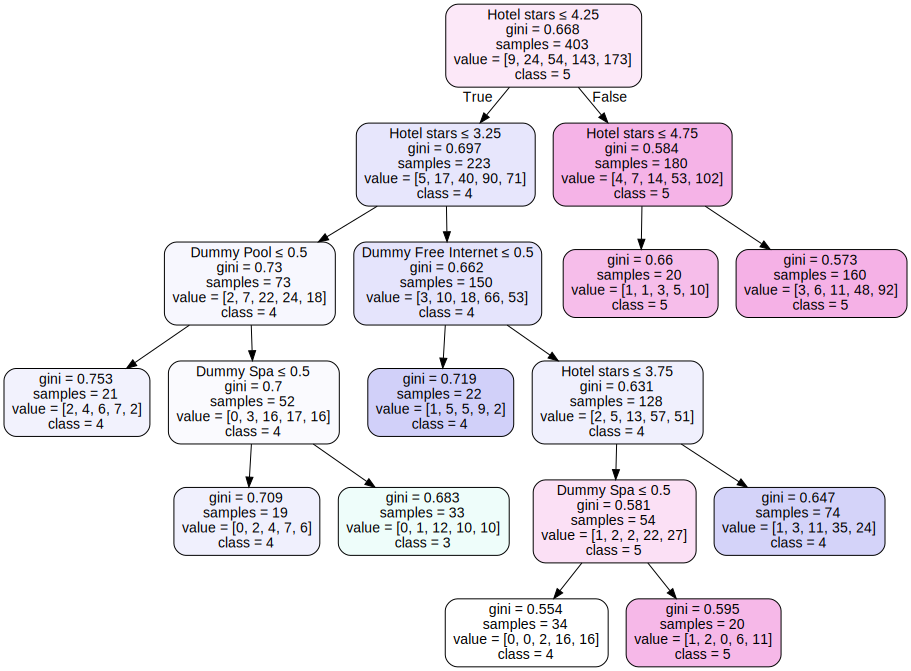

In [26]:
dot_data = export_graphviz(classification_tree, out_file=None,  
                           feature_names = ['Hotel stars', 'Dummy Pool', 'Dummy Free Internet', 'Dummy Spa', 'Dummy Gym'],  
                           class_names = ['1','2','3','4','5'], 
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)
graph
#graph.render("iris", view=True) 

In [27]:
model = DecisionTreeClassifier()

model.fit(xtrain, ytrain)

y_pred = model.predict(xtest)

print(f'Accuracy Score: {metrics.accuracy_score(ytest, y_pred)}')
print(f'Precision Score: {metrics.precision_score(ytest, y_pred, average="macro")}')
print(f'Recall Score: {metrics.recall_score(ytest, y_pred, average="macro")}')
print(f'F1 Score: {metrics.f1_score(ytest, y_pred, average="macro")}')

Accuracy Score: 0.42574257425742573
Precision Score: 0.23217391304347826
Recall Score: 0.2513227513227513
F1 Score: 0.22715436357862523


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Run this cell if working in Google CoLab
!pip uninstall scikit-learn -y
!pip uninstall imbalanced-learn -y

!pip install -U scikit-learn imbalanced-learn

Found existing installation: scikit-learn 1.0.1
Uninstalling scikit-learn-1.0.1:
  Successfully uninstalled scikit-learn-1.0.1
Found existing installation: imbalanced-learn 0.8.1
Uninstalling imbalanced-learn-0.8.1:
  Successfully uninstalled imbalanced-learn-0.8.1
     |████████████████████████████████| 23.2 MB 78 kB/s 
     |████████████████████████████████| 189 kB 50.5 MB/s 


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingRegressor, AdaBoostClassifier
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight

In [11]:
def model_validation(ytrue, y_pred):
    '''Definition for computing and printing a series of Classification metric scores'''
    print(f'Accuracy Score: {metrics.accuracy_score(ytrue, y_pred)}')
    print(f'Precision Score: {metrics.precision_score(ytrue, y_pred, average="macro")}')
    print(f'Recall Score: {metrics.recall_score(ytrue, y_pred, average="macro")}')
    print(f'F1 Score: {metrics.f1_score(ytrue, y_pred, average="macro")}')

In [28]:
# Set parameter for max number of features for Random Forest
from sklearn.ensemble import RandomForestClassifier, BaggingRegressor, AdaBoostClassifier

features = df[['Hotel stars', 'Dummy Pool', 'Dummy Free Internet', 'Dummy Spa', 'Dummy Gym']]
target = df['Score']

xtrain, xtest, ytrain, ytrue = train_test_split(features, target)


m = np.int64(np.sqrt(features.shape[1]))
print(m)

# Set up our Random Forest
random_forest = RandomForestClassifier(max_samples=0.75, oob_score=True)
random_forest.fit(xtrain, ytrain)

y_pred = random_forest.predict(xtest)

model_validation(ytrue, y_pred)

random_forest.feature_names_in_

2
Accuracy Score: 0.5079365079365079
Precision Score: 0.20109038737446197
Recall Score: 0.25433715220949266
F1 Score: 0.21937624419376248


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array(['Hotel stars', 'Dummy Pool', 'Dummy Free Internet', 'Dummy Spa',
       'Dummy Gym'], dtype=object)

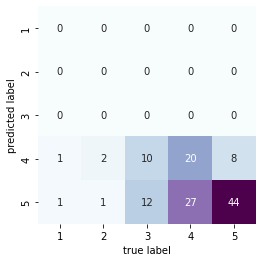

In [30]:
from sklearn.metrics import confusion_matrix

# Confusion matrix function makes easy work of obtaining matrix
mat = confusion_matrix(ytrue, y_pred)

# Use seaborn to make a heatmap of the confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_, cmap=plt.cm.BuPu)
plt.xlabel('true label')
plt.ylabel('predicted label');

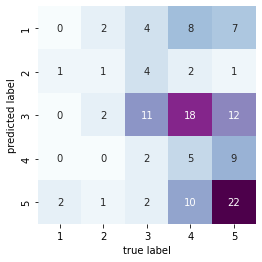

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion matrix function makes easy work of obtaining matrix
mat = confusion_matrix(ytrue, y_pred)

# Use seaborn to make a heatmap of the confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_, cmap=plt.cm.BuPu)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Over Sampling the Data

In [31]:
features = df[['Hotel stars', 'Dummy Pool', 'Dummy Free Internet', 'Dummy Spa', 'Dummy Gym']]
target = df['Score']

xtrain, xtest, ytrain, ytrue = train_test_split(features, target)

ros = RandomOverSampler()#random_state=42)
X_resampled, y_resampled = ros.fit_resample(xtrain, ytrain)

model = DecisionTreeClassifier()#random_state=5)

model.fit(X_resampled, y_resampled)

y_pred = model.predict(xtest)

model_validation(ytrue, y_pred)

Accuracy Score: 0.373015873015873
Precision Score: 0.2061846728151076
Recall Score: 0.29373737373737374
F1 Score: 0.23039711295146076


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.utils import class_weight

# Under Sampling

In [33]:
# logistic regression object
lr = LogisticRegression()
 
# train the model on train set
lr.fit(xtrain, ytrain.ravel())
 
predictions = lr.predict(xtest)
 
# print classification report
print(metrics.classification_report(ytrue, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        18
           4       0.22      0.25      0.24        32
           5       0.51      0.77      0.61        60

    accuracy                           0.43       126
   macro avg       0.15      0.20      0.17       126
weighted avg       0.30      0.43      0.35       126



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

In [ ]:
sm = SMOTE(sampling_strategy='minority', random_state = 2)
xtrain_res, ytrain_res = sm.fit_resample(xtrain, ytrain)

In [ ]:
print(xtrain_res.shape)
print(ytrain_res.shape)

In [ ]:
lr1 = LogisticRegression()
lr1.fit(xtrain_res, ytrain_res)
predictions = lr1.predict(xtest)
 
# print classification report
print(metrics.classification_report(ytest, predictions))

In [ ]:
predictions = (lr1.predict_proba(xtest)[:,1]>=0.7).astype(int)
 
# print classification report
print(metrics.classification_report(ytest, predictions))

# Ada Boost

In [ ]:
adaboost = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_features=m, max_samples=.75),
                              learning_rate=.1, n_estimators=25, random_state=1)

adaboost.fit(xtrain, ytrain)

y_pred = adaboost.predict(xtest)

model_validation(ytest, y_pred)